<a href="https://colab.research.google.com/github/ambitama-poddar/Machine-Learning-Practicals/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet50 model

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten ,Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!unzip drive/My\ Drive/Colab\ Notebooks/archive.zip

Archive:  drive/My Drive/Colab Notebooks/archive.zip
replace Testing/glioma_tumor/image(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [25]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [26]:
model_history = model.fit(
train_generator,
epochs = 10,
validation_data = validation_generator)

Epoch 1/10
90/90 [==============================] - 81s 402ms/step - loss: 6.5660 - accuracy: 0.6847 - val_loss: 1444.3040 - val_accuracy: 0.2919
Epoch 2/10
90/90 [==============================] - 33s 369ms/step - loss: 0.5146 - accuracy: 0.8460 - val_loss: 1.3854 - val_accuracy: 0.2640
Epoch 3/10
90/90 [==============================] - 34s 382ms/step - loss: 0.4218 - accuracy: 0.8930 - val_loss: 1.3832 - val_accuracy: 0.2817
Epoch 4/10
90/90 [==============================] - 33s 369ms/step - loss: 0.2728 - accuracy: 0.9268 - val_loss: 1.5043 - val_accuracy: 0.2766
Epoch 5/10
90/90 [==============================] - 34s 371ms/step - loss: 0.1826 - accuracy: 0.9467 - val_loss: 1.5207 - val_accuracy: 0.2234
Epoch 6/10
90/90 [==============================] - 33s 369ms/step - loss: 0.1168 - accuracy: 0.9648 - val_loss: 2.4009 - val_accuracy: 0.2335
Epoch 7/10
90/90 [==============================] - 33s 369ms/step - loss: 0.0770 - accuracy: 0.9784 - val_loss: 3.6709 - val_accuracy: 0.2

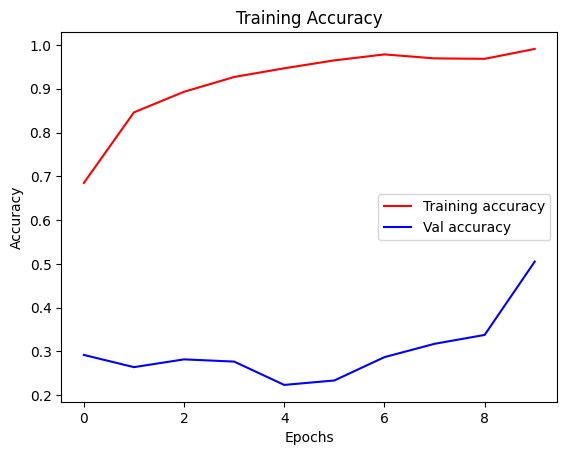

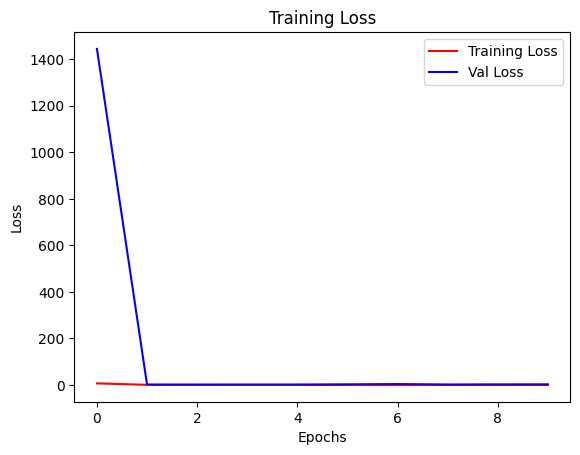

In [28]:

import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# InceptionV3Net

In [30]:
model = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False, input_shape = (224, 224, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                

In [34]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 24s 270ms/step - loss: 0.1281 - accuracy: 0.9596 - val_loss: 1.6132 - val_accuracy: 0.6574
Epoch 2/30
90/90 [==============================] - 24s 264ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 2.5560 - val_accuracy: 0.7411
Epoch 3/30
90/90 [==============================] - 23s 259ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 1.2003 - val_accuracy: 0.7868
Epoch 4/30
90/90 [==============================] - 24s 263ms/step - loss: 0.0358 - accuracy: 0.9895 - val_loss: 1.8800 - val_accuracy: 0.7716
Epoch 5/30
90/90 [==============================] - 23s 259ms/step - loss: 0.0568 - accuracy: 0.9843 - val_loss: 2.3885 - val_accuracy: 0.6345
Epoch 6/30
90/90 [==============================] - 23s 260ms/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 2.2651 - val_accuracy: 0.7792
Epoch 7/30
90/90 [==============================] - 24s 261ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 2.7538 - val_accuracy: 0.7335

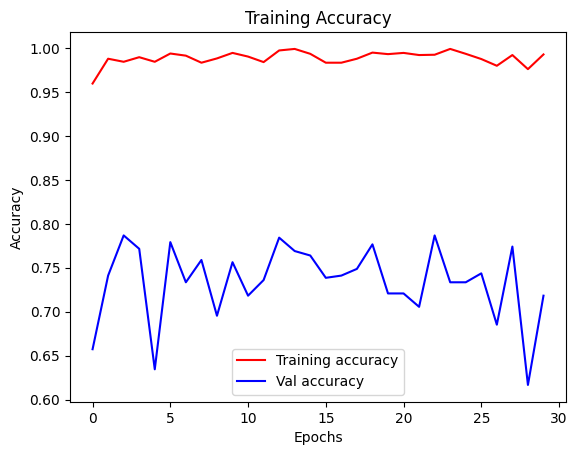

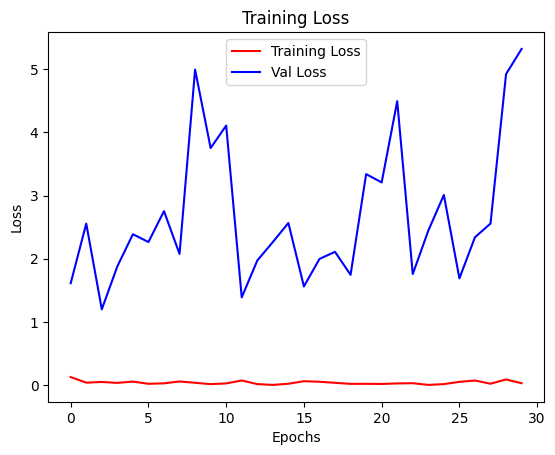

In [35]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# DenseNet121

In [43]:
model = tf.keras.applications.DenseNet121(weights='imagenet',include_top=False, input_shape = (224, 224, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_12[0][0]']               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                          

In [44]:
model_history = model.fit(
train_generator,
epochs = 10,
validation_data = validation_generator)

Epoch 1/10
90/90 [==============================] - 135s 481ms/step - loss: 7.3100 - accuracy: 0.5944 - val_loss: 26118.0586 - val_accuracy: 0.2538
Epoch 2/10
90/90 [==============================] - 34s 379ms/step - loss: 0.5715 - accuracy: 0.8105 - val_loss: 4.6383 - val_accuracy: 0.4594
Epoch 3/10
90/90 [==============================] - 34s 374ms/step - loss: 0.2337 - accuracy: 0.9129 - val_loss: 1.9184 - val_accuracy: 0.6421
Epoch 4/10
90/90 [==============================] - 34s 378ms/step - loss: 0.1416 - accuracy: 0.9512 - val_loss: 1.7571 - val_accuracy: 0.6853
Epoch 5/10
90/90 [==============================] - 34s 375ms/step - loss: 0.0815 - accuracy: 0.9725 - val_loss: 1.5022 - val_accuracy: 0.7284
Epoch 6/10
90/90 [==============================] - 34s 375ms/step - loss: 0.9005 - accuracy: 0.8753 - val_loss: 33675.1914 - val_accuracy: 0.2487
Epoch 7/10
90/90 [==============================] - 35s 388ms/step - loss: 1.3179 - accuracy: 0.5986 - val_loss: 30.6897 - val_accura

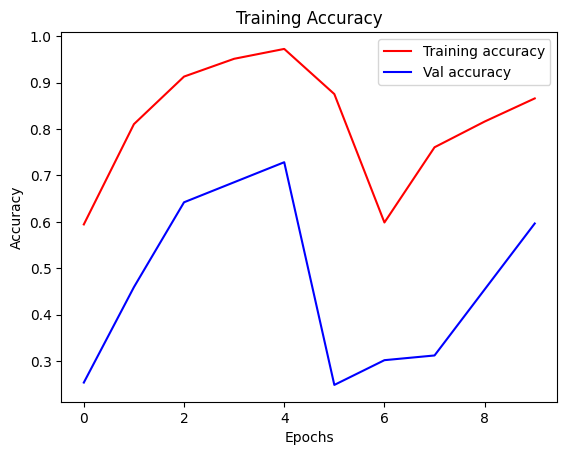

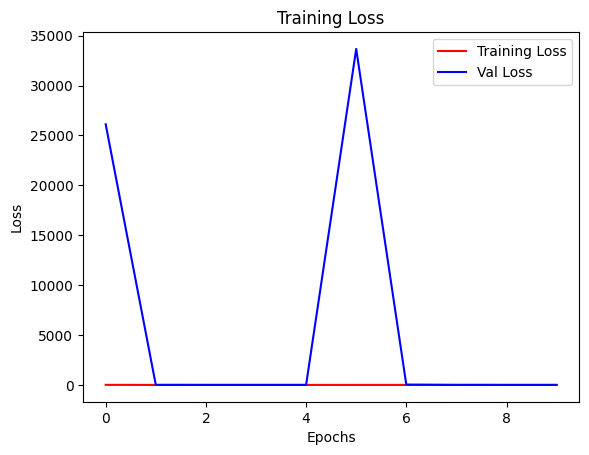

In [45]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()